In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    f1_score,
    average_precision_score,
    precision_recall_curve
)


In [4]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Tenx_challenge_folder\fraud-detection\data\processed\creditcard_cleaned.csv")
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,hour,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.0,-0.073813


In [5]:
df["Class"].value_counts(normalize=True)


Class
0    0.998316
1    0.001684
Name: proportion, dtype: float64

In [6]:
X = df.drop("Class", axis=1)
y = df["Class"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [8]:
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [9]:
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]


In [10]:
f1_lr = f1_score(y_test, y_pred_lr)
print("Logistic Regression F1-score:", f1_lr)


Logistic Regression F1-score: 0.10651629072681704


In [11]:
auc_pr_lr = average_precision_score(y_test, y_proba_lr)
print("Logistic Regression AUC-PR:", auc_pr_lr)


Logistic Regression AUC-PR: 0.7252943436402637


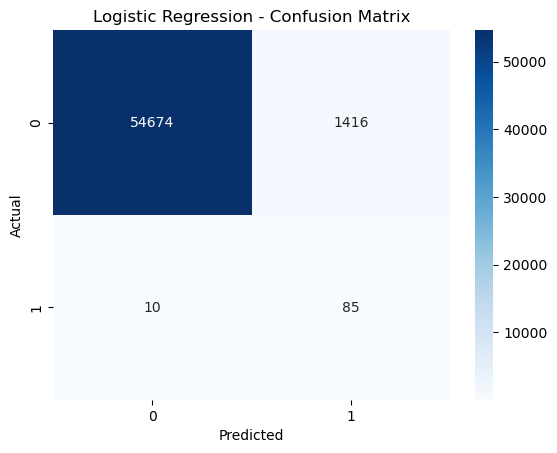

In [12]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [14]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]


In [15]:
f1_rf = f1_score(y_test, y_pred_rf)
print("Random Forest F1-score:", f1_rf)


Random Forest F1-score: 0.8342245989304813


In [16]:
auc_pr_rf = average_precision_score(y_test, y_proba_rf)
print("Random Forest AUC-PR:", auc_pr_rf)


Random Forest AUC-PR: 0.8024946018873975


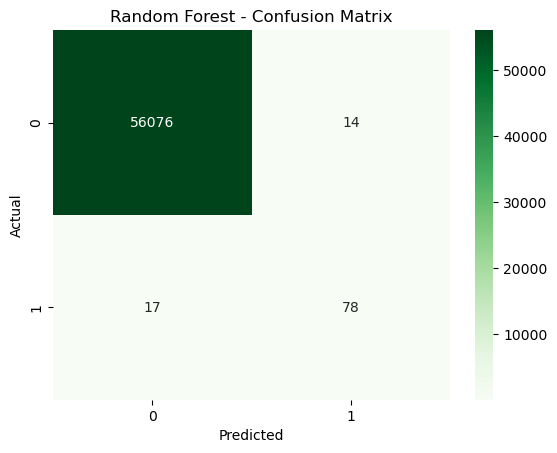

In [17]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [18]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [19]:
lr_cv = cross_validate(
    log_reg,
    X,
    y,
    cv=skf,
    scoring=["f1", "average_precision"],
    n_jobs=-1
)

print("Logistic Regression CV Results")
print("F1 mean:", lr_cv["test_f1"].mean())
print("F1 std:", lr_cv["test_f1"].std())
print("AUC-PR mean:", lr_cv["test_average_precision"].mean())


Logistic Regression CV Results
F1 mean: 0.10908640706648447
F1 std: 0.0022781118625968483
AUC-PR mean: 0.7324465000893332


In [25]:
rf_cv = cross_validate(
    rf,
    X,
    y,
    cv=skf,
    scoring=["f1", "average_precision"],
    n_jobs=-1
)

print("Random Forest CV Results")
print("F1 mean:", rf_cv["test_f1"].mean())
print("F1 std:", rf_cv["test_f1"].std())
print("AUC-PR mean:", rf_cv["test_average_precision"].mean())


Random Forest CV Results
F1 mean: 0.8294828976113893
F1 std: 0.03015374797676121
AUC-PR mean: 0.8061847675381104


In [23]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "F1 Score": [f1_lr, f1_rf],
    "AUC-PR": [auc_pr_lr, auc_pr_rf]
})

comparison


,Model,F1 Score,AUC-PR
0,Logistic Regression,0.106516,0.725294
1,Random Forest,0.834225,0.802495


In [24]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)


V14    0.187207
V4     0.117649
V10    0.115765
V17    0.105964
V12    0.082877
V11    0.078980
V3     0.055053
V7     0.032980
V16    0.028857
V2     0.022268
dtype: float64